In [69]:
import seaborn as sns

# Titanic-Daten laden
titanic = sns.load_dataset('titanic')

# Zeigt dir die ersten 5 Zeilen des Datensatzes
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [70]:
# Zeige fehlende Werte
print(titanic.isnull().sum())

# Beispielsweise: Fehlende Werte für 'age' mit dem Median füllen
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fehlende Werte in 'embarked' mit dem häufigsten Wert füllen
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Überprüfen, ob noch fehlende Werte vorhanden sind
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


C:\Users\RickE\AppData\Local\Temp\ipykernel_7640\1993504991.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\RickE\AppData\Local\Temp\ipykernel_7640\1993504991.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [71]:
# Kategorische Spalten in numerische umwandeln
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# 'embarked' in numerische Werte umwandeln
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Überprüfen
print(titanic.head())


   survived  pclass  sex   age  sibsp  parch     fare  embarked  class    who  \
0         0       3    0  22.0      1      0   7.2500         2  Third    man   
1         1       1    1  38.0      1      0  71.2833         0  First  woman   
2         1       3    1  26.0      0      0   7.9250         2  Third  woman   
3         1       1    1  35.0      1      0  53.1000         2  First  woman   
4         0       3    0  35.0      0      0   8.0500         2  Third    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True  


In [72]:
# Features (Eingaben)
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

# Zielvariable (ob jemand überlebt hat)
y = titanic['survived']


In [73]:
from sklearn.model_selection import train_test_split

# Testdaten (z. B. 30% der Daten)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Größe der Trainings- und Testdaten
print(f"Training Data: {X_train.shape}")
print(f"Test Data: {X_test.shape}")


Training Data: (623, 7)
Test Data: (268, 7)


In [74]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [75]:
# Test the model's accuracy on the test data
accuracy = model.score(X_test, y_test)
print(f'Model accuracy: {accuracy}')


Model accuracy: 0.753731343283582


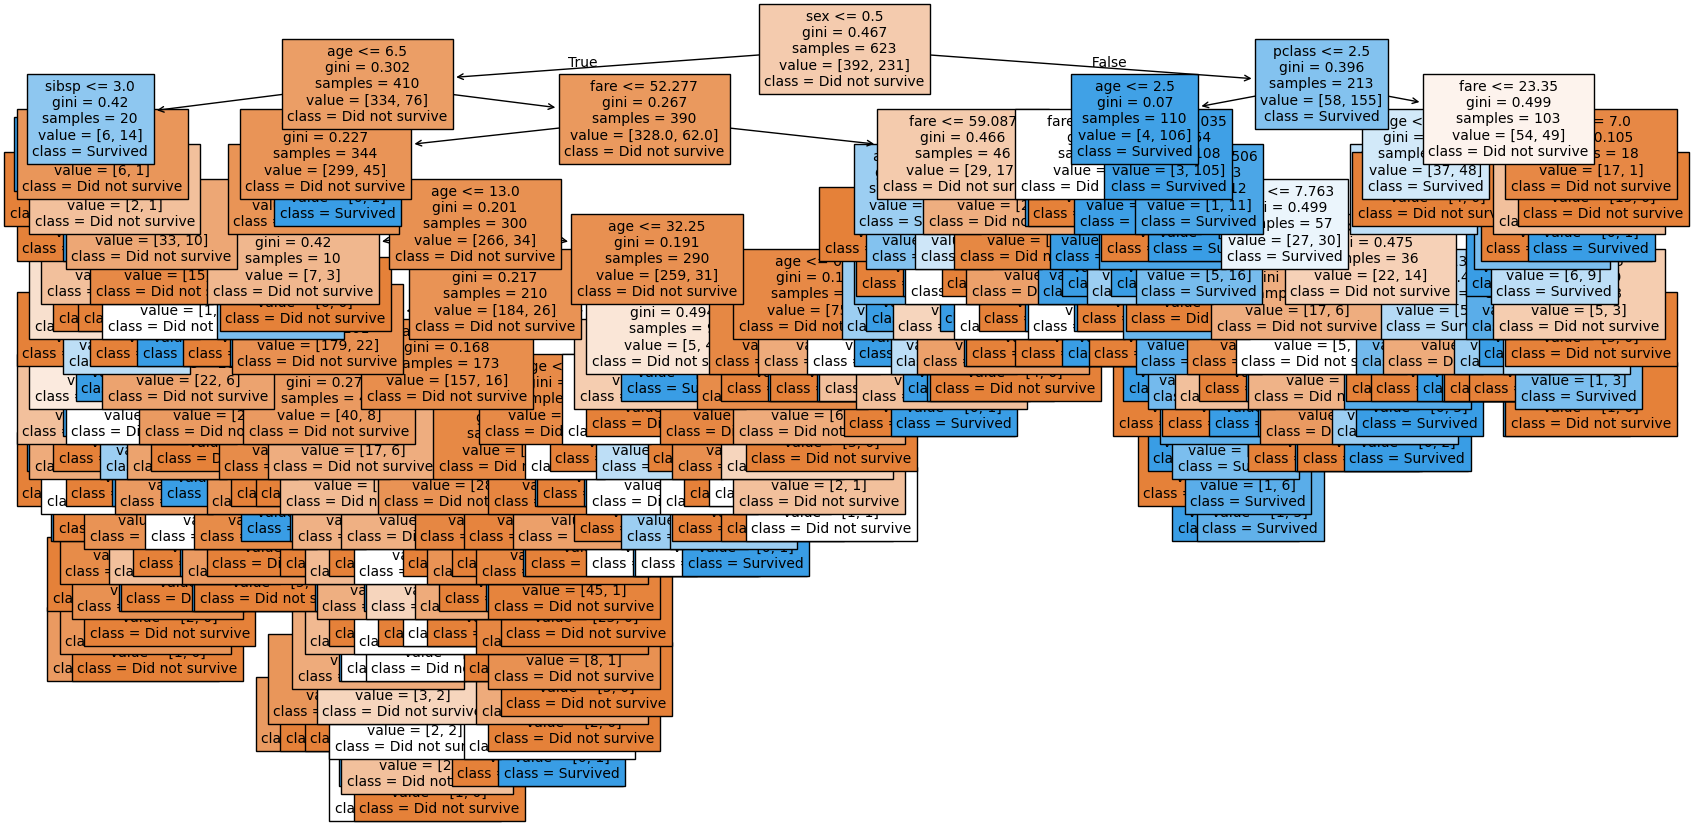

In [76]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the trained decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Did not survive', 'Survived'], filled=True, fontsize=10)
plt.show()


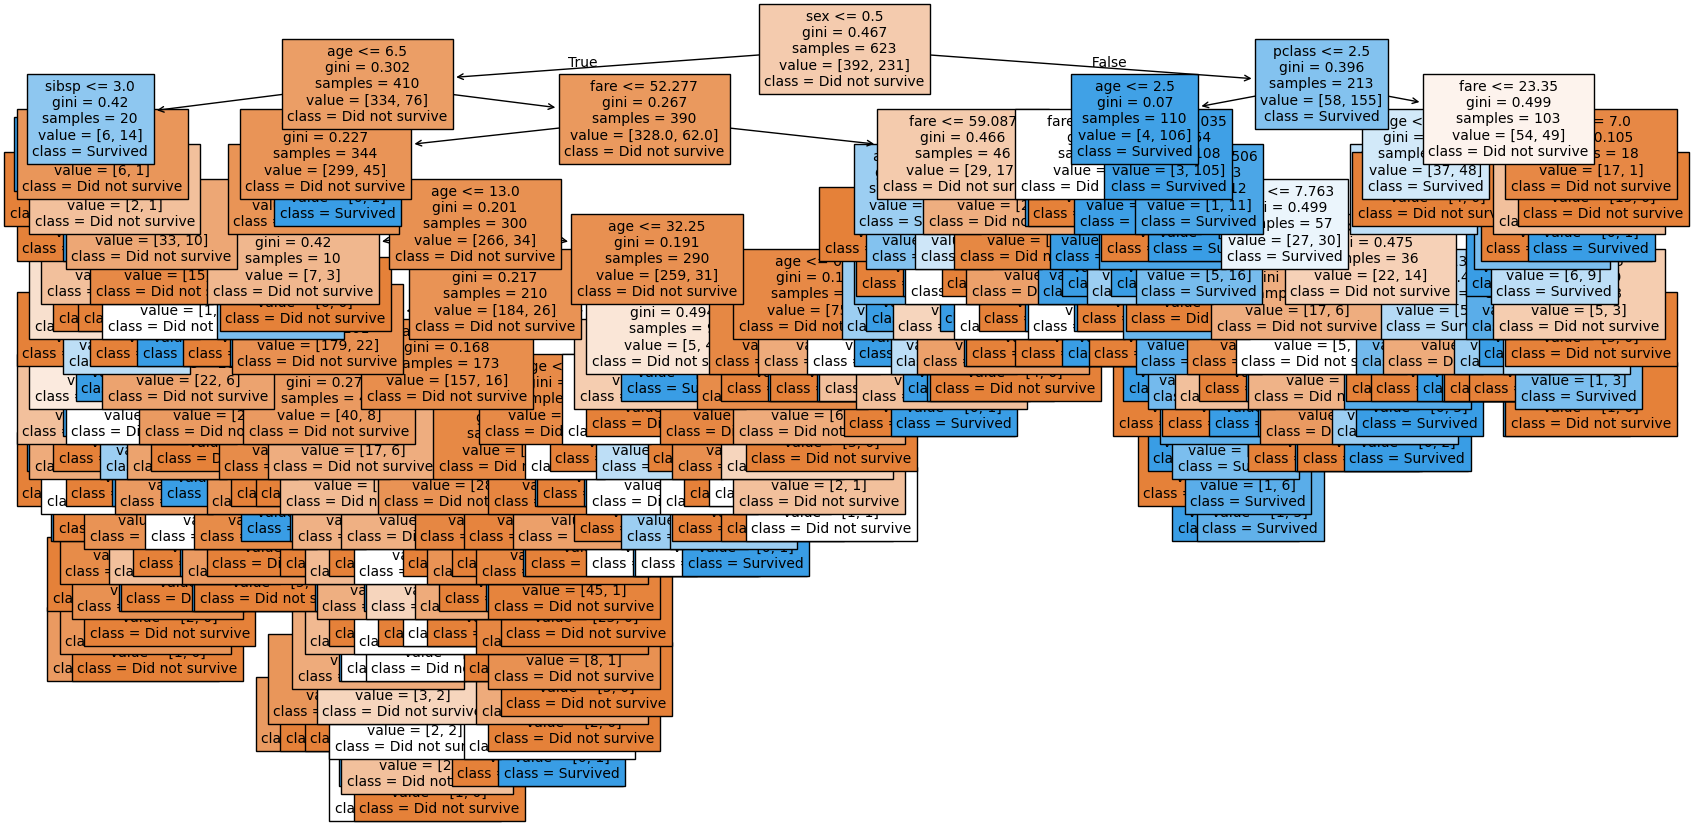

In [77]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Did not survive', 'Survived'], filled=True, fontsize=10)
plt.show()


In [78]:
# Getting feature importance from the model
feature_importance = model.feature_importances_
import pandas as pd
# Displaying feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


    Feature  Importance
1       sex    0.298372
5      fare    0.274080
2       age    0.216023
0    pclass    0.096599
3     sibsp    0.058363
6  embarked    0.039170
4     parch    0.017393


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

# Get one test sample (Passenger 3)
sample = X_test.iloc[[2]]

# Get the path through the tree
node_indicator = model.decision_path(sample)
leaf_id = model.apply(sample)


In [80]:
# Getting the decision path for passenger 3
decision_path = model.apply(X_test)

# Display which nodes the decision path for passenger 3 passed through
passenger_3_path = decision_path[2]  # Assuming Passenger 3 is at index 2 in X_test
print("Decision path for Passenger 3:", passenger_3_path)


Decision path for Passenger 3: 107


In [81]:
feature = model.tree_.feature
threshold = model.tree_.threshold

print("Decision path for Passenger 3:\n")

for node_id in node_indicator.indices:
    if leaf_id[0] == node_id:
        print(f"--> Reached leaf node {node_id}")
        continue

    if sample.values[0, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        f"Node {node_id}: (Feature: {X_test.columns[feature[node_id]]}) "
        f"{sample.values[0, feature[node_id]]:.2f} {threshold_sign} {threshold[node_id]:.2f}"
    )


Decision path for Passenger 3:

Node 0: (Feature: sex) 0.00 <= 0.50
Node 1: (Feature: age) 20.00 > 6.50
Node 9: (Feature: fare) 7.92 <= 52.28
Node 10: (Feature: age) 20.00 <= 77.00
Node 11: (Feature: pclass) 3.00 > 1.50
Node 33: (Feature: age) 20.00 > 13.00
Node 39: (Feature: age) 20.00 <= 32.25
Node 40: (Feature: age) 20.00 <= 31.50
Node 41: (Feature: embarked) 2.00 > 0.50
Node 67: (Feature: fare) 7.92 > 7.80
Node 101: (Feature: age) 20.00 <= 30.50
Node 102: (Feature: age) 20.00 <= 20.50
Node 103: (Feature: fare) 7.92 <= 8.18
Node 104: (Feature: fare) 7.92 > 7.91
Node 106: (Feature: fare) 7.92 <= 7.99
--> Reached leaf node 107


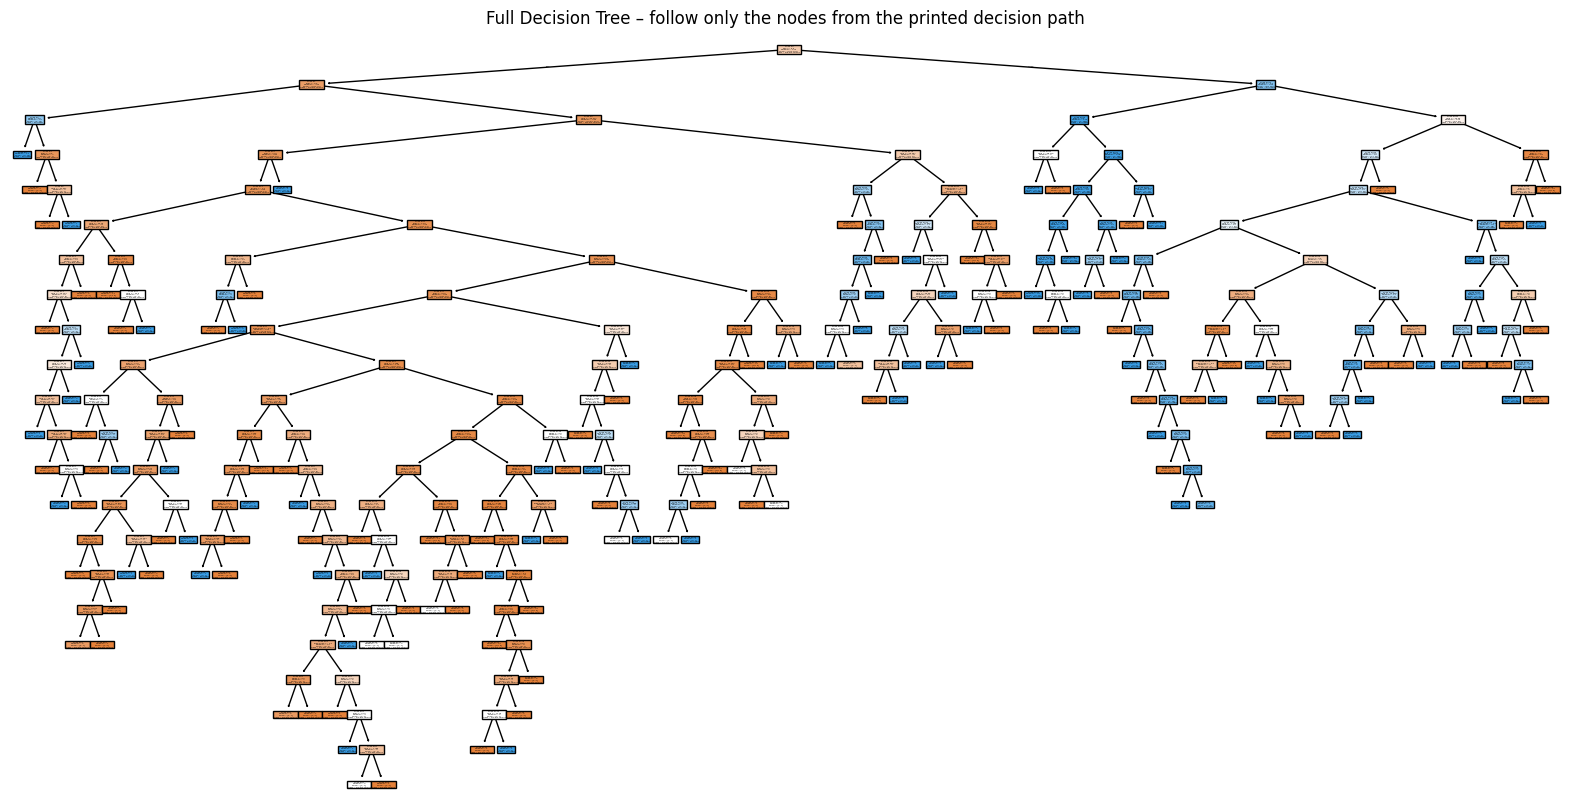

In [82]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get list of node IDs in the path
node_index = node_indicator.indices

plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Did not survive', 'Survived'],
    filled=True,
    impurity=False,
    node_ids=True
)

# Highlight nodes (manually if you want to annotate), or just use the printed path
plt.title("Full Decision Tree – follow only the nodes from the printed decision path")
plt.show()


In [83]:
import seaborn as sns
import pandas as pd

# Load the dataset
df = sns.load_dataset('titanic')

#print(df.columns)

df['FamilySize'] = df['sibsp'] + df['parch'] + 1
df['isalone'] = (df['FamilySize'] == 1).astype(int)
print(df[['sibsp', 'parch', 'FamilySize', 'isalone']].head(15))

    sibsp  parch  FamilySize  isalone
0       1      0           2        0
1       1      0           2        0
2       0      0           1        1
3       1      0           2        0
4       0      0           1        1
5       0      0           1        1
6       0      0           1        1
7       3      1           5        0
8       0      2           3        0
9       1      0           2        0
10      1      1           3        0
11      0      0           1        1
12      0      0           1        1
13      1      5           7        0
14      0      0           1        1


In [84]:
#X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
features = ['pclass', 'sex', 'age', 'fare', 'isalone']

from sklearn.model_selection import train_test_split

# Drop rows with missing values in used features
df_model = df[features + ['survived']].dropna()

X = df_model[features]
y = df_model['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [85]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = sns.load_dataset('titanic')

# Feature engineering: FamilySize and IsAlone
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['isalone'] = (df['family_size'] == 1).astype(int)

# Select features and target
features = ['pclass', 'sex', 'age', 'fare', 'isalone']
df_model = df[features + ['survived']].dropna()

# Convert categorical 'sex' to numeric (0 = female, 1 = male)
df_model['sex'] = df_model['sex'].map({'female': 0, 'male': 1})

X = df_model[features]
y = df_model['survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model accuracy:", accuracy)


Model accuracy: 0.7430167597765364


In [86]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Model Accuracy:", accuracy_rf)


Random Forest Model Accuracy: 0.7653631284916201


In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, classification_report

# Cross-validation with Random Forest
cv_scores = cross_val_score(model_rf, X, y, cv=5, scoring='accuracy')

# Print out cross-validation scores
print("Cross-validation Accuracy Scores:", cv_scores)
print("Average Cross-validation Accuracy:", cv_scores.mean())

# Optional: Get more metrics (Precision, Recall, F1-Score)
y_pred_cv = model_rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_cv))

# Confusion matrix to visualize prediction errors
cm = confusion_matrix(y_test, y_pred_cv)
print("Confusion Matrix:\n", cm)


Cross-validation Accuracy Scores: [0.74825175 0.81818182 0.81818182 0.76923077 0.88732394]
Average Cross-validation Accuracy: 0.8082340195016251
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       107
           1       0.72      0.68      0.70        72

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179

Confusion Matrix:
 [[88 19]
 [23 49]]


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# Hyperparameters to tune
param_dist = {
    'n_estimators': np.arange(10, 201, 10),  # Number of trees
    'max_depth': np.arange(1, 21, 1),  # Depth of trees
    'min_samples_split': np.arange(2, 21, 1),  # Minimum samples required to split
    'min_samples_leaf': np.arange(1, 21, 1),  # Minimum samples required at leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Features considered for split
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_
# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the results
print("Best Hyperparameters:", best_params)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\RickE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
140 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\RickE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\RickE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\

Best Hyperparameters: {'n_estimators': np.int64(160), 'min_samples_split': np.int64(11), 'min_samples_leaf': np.int64(4), 'max_features': 'sqrt', 'max_depth': np.int64(9), 'bootstrap': True}
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       107
           1       0.76      0.69      0.72        72

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
 [[91 16]
 [22 50]]


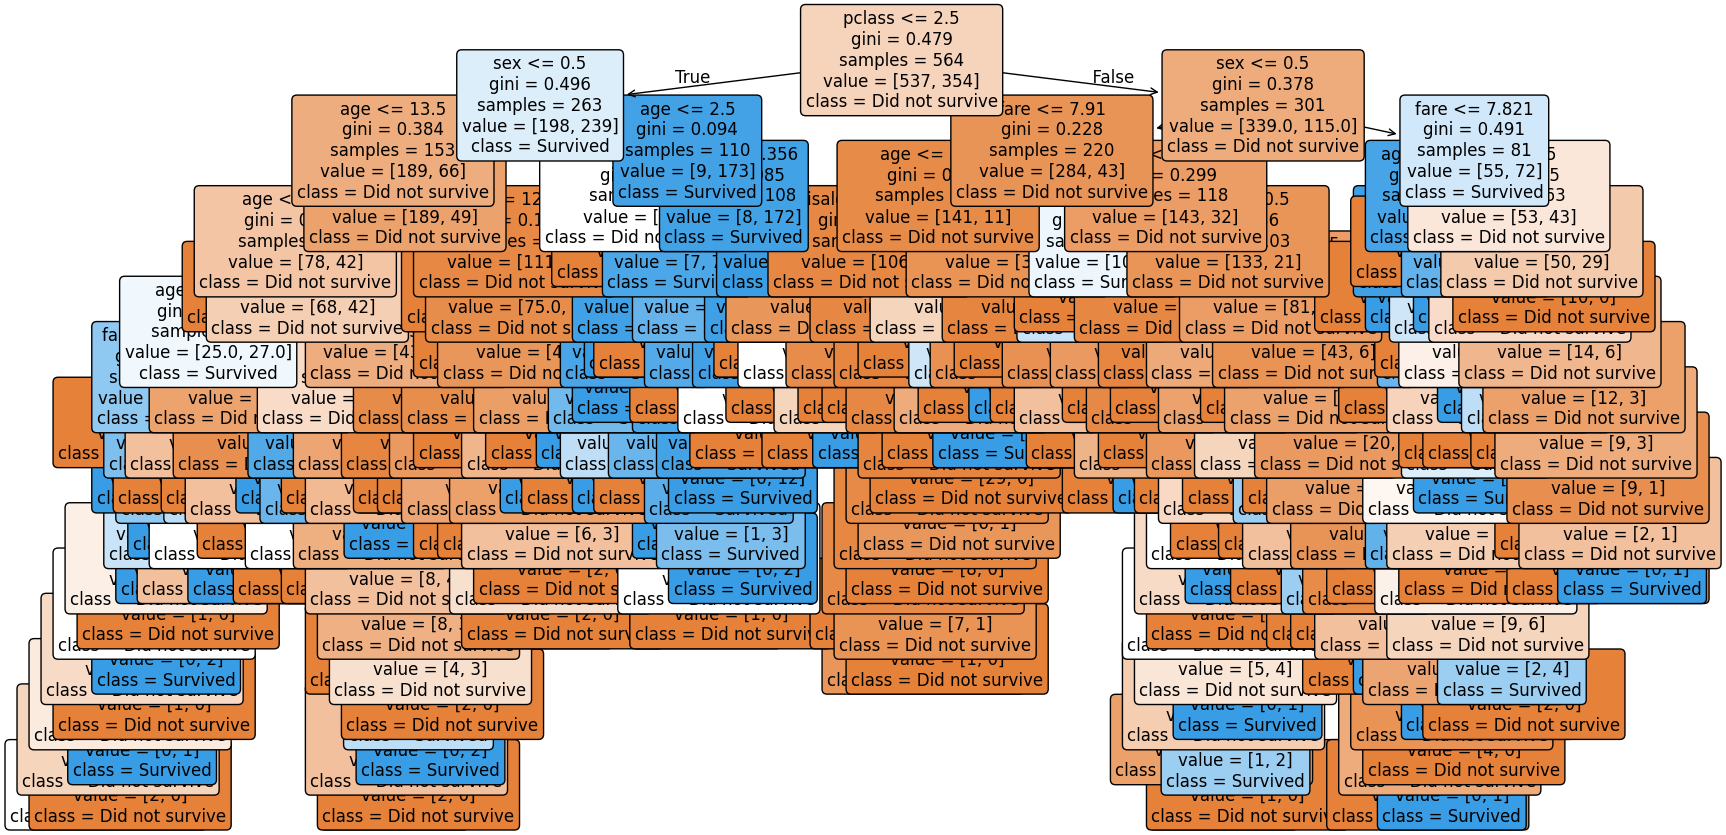

In [90]:
# Create 'isalone' feature first
titanic['familysize'] = titanic['sibsp'] + titanic['parch']
titanic['isalone'] = (titanic['familysize'] == 0).astype(int)

# Now define features and target
X = titanic[['pclass', 'sex', 'age', 'fare', 'isalone']]
y = titanic['survived']

# Train the random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Plot the first decision tree
tree = rf_model.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=['pclass', 'sex', 'age', 'fare', 'isalone'], class_names=['Did not survive', 'Survived'], rounded=True, fontsize=12)
plt.show()
